In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m spacy download en_core_web_sm

In [5]:
import pathlib; import psutil; _tmp = psutil.Process().parent().cmdline()
print('CondaEnv:', pathlib.Path(_tmp[0]).parent.parent.stem, '|', [_tmp2 for _tmp2 in _tmp if '--port' in _tmp2], '|', _tmp)
!jupyter notebook list
!curl -sSLG localhost:8371/api/sessions --data-urlencode `jupyter notebook list | grep ':8371' | awk '/token/ {split($1,a,"?")} END {print a[2]}'`  | jq


CondaEnv: conda | ['--port=8371'] | ['/storage/arkareem/libraries/conda/bin/python', '/storage/arkareem/libraries/conda/bin/jupyter-notebook', '--no-browser', '--port=8371']
Currently running servers:
http://localhost:8371/?token=03585691df2685c7953fa167673554e1617b9c459d0f8c17 :: /storage/arkareem/projects
[
  {
    "id": "3307314d-3826-4782-9a2e-1e4f58d3f9e3",
    "path": "explore_data-jvsc-1383a0b1-7b3c-42aa-87b9-41c9d55d9aa367e74300-6f56-400c-aaab-1c1e5d36fcd2.ipynb",
    "name": "8da6a853-9f21-4b80-a972-45ceb8e5e28d",
    "type": "notebook",
    "kernel": {
      "id": "0a4630be-3d26-4586-88af-cf2beb957f31",
      "name": "python3",
      "last_activity": "2023-05-03T01:29:54.733966Z",
      "execution_state": "idle",
      "connections": 0
    },
    "notebook": {
      "path": "explore_data-jvsc-1383a0b1-7b3c-42aa-87b9-41c9d55d9aa367e74300-6f56-400c-aaab-1c1e5d36fcd2.ipynb",
      "name": "8da6a853-9f21-4b80-a972-45ceb8e5e28d"
    }
  },
  {
    "id": "3e3457b8-82c7-4e87-9295-35

In [8]:
try: mylibs
except: mylibs = set()
import importlib
reload_my_libs = lambda : [importlib.reload(lib) for lib in mylibs]

import dataset

mylibs.add(dataset)
reload_my_libs()

[<module 'dataset' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/dataset.py'>]

# torchtext

In [1]:
import torchtext
torchtext.datasets.PennTreebank()

(ShardingFilterIterDataPipe,
 ShardingFilterIterDataPipe,
 ShardingFilterIterDataPipe)

In [ ]:
import torch
from torchtext.datasets import PennTreebank
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Define a tokenizer
tokenizer = get_tokenizer('basic_english')

# Load the Penn Treebank dataset
train_dataset, valid_dataset, test_dataset = PennTreebank()

# Build the vocabulary from the training dataset
train_vocab = build_vocab_from_iterator(map(tokenizer, train_dataset), specials=["<unk>", "<pad>"])

# Define a function to numericalize the tokens
def numericalize_tokens(tokens):
    return [train_vocab.stoi[token] for token in tokens]

# Define a function to preprocess a sentence
def preprocess_sentence(sentence):
    return numericalize_tokens(tokenizer(sentence))

# Example usage:
sentence = "This is an example sentence."
numericalized = preprocess_sentence(sentence)
tensor = torch.tensor(numericalized)
print(tensor)


In [93]:
import torchtext
from torchtext.datasets import PennTreebank

# Load the PennTreebank dataset
train_data = PennTreebank(split='train')
valid_data = PennTreebank(split='valid')
test_data = PennTreebank(split='test')

# Print some examples
print(len(list(train_data)))
print(len(list(valid_data)))
print(len(list(test_data)))


42068
3370
3761


In [95]:
print('sum train', sum([len(sentence.split(' ')) for sentence in train_data]))
print('sum valid', sum([len(sentence.split(' ')) for sentence in valid_data]))
print('sum test', sum([len(sentence.split(' ')) for sentence in test_data]))
887521+70390+78669

sum train 887521
sum valid 70390
sum test 78669


1036580

In [ ]:
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Tag sentences with spaCy
for sentence in tqdm(list(train_data)):
  doc = nlp(sentence)
  words = [token.text for token in doc]
  tags = [token.pos_ for token in doc]
#   print(words, tags)


In [31]:
for i, n in enumerate(train_data):
    print(n)
    if i == 10: break

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter
pierre <unk> N years old will join the board as a nonexecutive director nov. N
mr. <unk> is chairman of <unk> n.v. the dutch publishing group
rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate
a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported
the asbestos fiber <unk> is unusually <unk> once it enters the <unk> with even brief exposures to it causing symptoms that show up decades later researchers said
<unk> inc. the unit of new york-based <unk> corp. that makes kent cigarettes stopped using <unk> in its <unk> cigarette filters in N
although preliminary findings were reported more

/storage/arkareem/libraries/conda/lib/python3.9/site-packages/torch/utils/data/datapipes/iter/combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


# ibm data

In [56]:
!mkdir .data
!wget -q -O .data/ptb.zip https://ibm.box.com/shared/static/z2yvmhbskc45xd2a9a4kkn6hg4g4kj5r.zip
!unzip -o .data/ptb.zip -d .data
!cp .data/ptb/reader.py .


In [66]:
import reader
import importlib
importlib.reload(reader)

<module 'reader' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/reader.py'>

In [ ]:
!wget -O .data/simple-examples.tgz http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!mkdir .data/simple-examples
!tar xzf .data/simple-examples.tgz -C .data/simple-examples


In [96]:
data_dir = ".data/simple-examples/simple-examples/data/"
raw_data = reader.ptb_raw_data(data_dir)
train_data, valid_data, test_data, vocab, word_to_id = raw_data
print(len(train_data))
print(len(valid_data))
print(len(test_data))

929589
73760
82430


In [78]:
def id_to_word(id_list):
    line = []
    for w in id_list:
        for word, wid in word_to_id.items():
            if wid == w:
                line.append(word)
    return line            
                

print(id_to_word(train_data[0:100]))


['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of']


In [114]:
itera = reader.ptb_iterator(train_data, 16, 3)
first_touple = itera.__next__()
x = first_touple[0]
y = first_touple[1]
x, y, x.shape

(array([[9970, 9971, 9972],
        [   5, 2437,   54],
        [   6,    1,  232],
        [  34,   97, 4647],
        [   0,  332, 7147],
        [  18,  937, 1238],
        [   2,  823,    1],
        [   8,    1, 1716],
        [   5,    6, 1969],
        [  19,  484, 1112],
        [5266,    7,  390],
        [  53,  101,   26],
        [ 554,   16,  850],
        [   5,   25,  192],
        [   1,    9,  161],
        [  29,  466, 2028]], dtype=int32),
 array([[9971, 9972, 9974],
        [2437,   54, 2155],
        [   1,  232,   70],
        [  97, 4647,   43],
        [ 332, 7147,  328],
        [ 937, 1238, 1340],
        [ 823,    1,  376],
        [   1, 1716,    6],
        [   6, 1969,    0],
        [ 484, 1112, 1666],
        [   7,  390,   15],
        [ 101,   26, 1378],
        [  16,  850,    3],
        [  25,  192,   18],
        [   9,  161,  293],
        [ 466, 2028,    7]], dtype=int32),
 (16, 3))

# sbert

In [9]:

import numpy as np
import torch

import sbert
mylibs.add(sbert)
reload_my_libs()

[<module 'dataset' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/dataset.py'>,
 <module 'sbert' from '/storage/arkareem/projects/classes/Penn-Tree-Bank-Project/sbert.py'>]

In [10]:
import wandb
!wandb login  # copy the key from https://wandb.ai/authorize

wandb: Currently logged in as: arkareem. Use `wandb login --relogin` to force relogin


In [11]:
data = dataset.get_treebank_3914()


In [6]:
device = 'cuda:2'

from transformers import AutoTokenizer, AutoModel
sbert_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/multi-qa-mpnet-base-dot-v1')
sbert_model = AutoModel.from_pretrained('sentence-transformers/multi-qa-mpnet-base-dot-v1')
sbert_model = sbert_model.to(device)


In [9]:
embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['train_sentences']], 64)
train_embeds_pooled = sbert.pool_tokens(data['train_sentences'], embeds, attn_masks, sbert_tokenizer)

embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['test_sentences']], 64)
test_embeds_pooled = sbert.pool_tokens(data['test_sentences'], embeds, attn_masks, sbert_tokenizer)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 783/783 [00:01<00:00, 677.55it/s]


## explore data

In [3]:
# clear cuda cache
# torch.cuda.empty_cache()
# !nvidia-smi

In [ ]:
print(data['all_pos'])


In [16]:
embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in data['train_sentences']], 64)

print(f'Storing embeds would take: {embeds.numel() * 4 / 1024 / 1024 / 1024:.2f} GB')
print(f'Wasted: {100*attn_masks.sum().item() / attn_masks.numel():.1f}%')
print(embeds.shape, attn_masks.shape)


print('The following sentences are longer than the maximum of 128 tokens:')
sent_id_overlen = torch.where(attn_masks[:, -1] == 1)[0]
for i in sent_id_overlen:
    print('\t', ' '.join(data['train_sentences'][i]))

Storing embeds would take: 1.15 GB
Wasted: 27.4%
torch.Size([3131, 128, 768]) torch.Size([3131, 128])
The following sentences are longer than the maximum of 128 tokens:
	 John William Davis , Colonsville , Miss. , fined *-4 $ 200,000 *U* ; Jeffrey Gerard Dompierre , Valrico , Fla. , $ 5,000 *U* and 10-day suspension ; Eugene Michael Felten , La Canada , Calif. , fined *-3 $ 25,000 *U* , ordered *-3 *-2 to disgorge $ 16,072 *U* and suspended *-3 one year ; Marion Stewart Spitler , La Canada , fined *-5 $ 15,000 *U* , ordered *-5 *-1 to disgorge $ 18,444 *U* and suspended *-5 six months .
	 Charles D. Phipps Sr. , Hermitage , Pa. , fined *-1 $ 10,000 *U* ; David Scott Rankin , Lake St. Louis , Mo. , $ 15,000 *U* ; Leigh A. Sanderoff , Gaithersburg , Md. , fined *-2 $ 45,000 *U* , ordered *-2 *-3 to disgorge $ 12,252 *U* ; Sandra Ann Smith , Ridgefield , N.J. , $ 15,000 *U* ; James G. Spence , Aloha , Ore. , $ 5,000 *U* and six-month suspension ; Mona Sun , Jamaica Estates , N.Y. , $ 60,0

In [17]:
# data['train_sentences']
i = 0
e = embeds[i, attn_masks[i]==1]
e.shape[0], len(data['train_sentences'][i])

print('sent', data['train_sentences'][i])
print('untokenized', sbert_tokenizer.convert_ids_to_tokens(sbert_tokenizer.encode_plus(' '.join(data['train_sentences'][i]))['input_ids']))

print('??? what is this in the test set', data['test_sentences'][739])

sent ['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
untokenized ['<s>', 'pierre', 'vin', '##ken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'none', '##x', '##ec', '##utive', 'director', 'nov', '.', '29', '.', '</s>']
??? what is this in the test set ['@']


[(',', 3896), ('the', 3248), ('.', 3064), ('of', 1849), ('to', 1722), ('a', 1461), ('in', 1237), ('and', 1204), ('*-1', 898), ('0', 872), ('*', 762), ("'s", 684), ('that', 644), ('for', 643), ('*T*-1', 636), ('The', 568), ('``', 566), ('*U*', 564), ("''", 557), ('$', 543), ('is', 538), ('said', 504), ('on', 381), ('it', 380), ('%', 375), ('by', 349), ('at', 323), ('as', 320), ('from', 311), ('with', 307), ('Mr.', 305), ('are', 298), ('million', 292), ('*-2', 292), ('be', 291), ('was', 283), ('has', 273), ('*T*-2', 272), ('its', 264), ('an', 260)]
[(',', 989), ('the', 797), ('.', 764), ('of', 470), ('to', 442), ('a', 417), ('in', 335), ('and', 307), ('0', 227), ('*-1', 225), ('*', 203), ('*U*', 180), ("'s", 180), ('$', 175), ('for', 174), ('*T*-1', 170), ('that', 163), ('The', 149), ('``', 136), ('is', 133), ("''", 127), ('said', 124), ('on', 109), ('it', 96), ('million', 91), ('was', 84), ('by', 80), ('with', 80), ('*-2', 80), ('at', 79), ('from', 75), ('*T*-2', 73), ('are', 71), ('%',

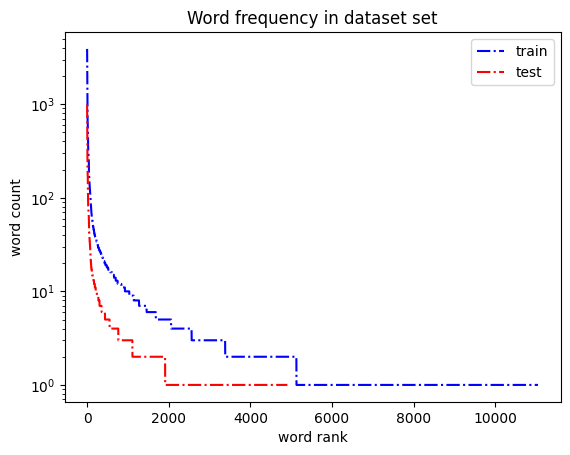

In [15]:
from matplotlib import pyplot as plt
from collections import Counter

all_words = [n for sent in data['train_sentences'] for n in sent]
counts = Counter(all_words)
max_counts_train = counts.most_common(40)
print(max_counts_train)
max_vals = sorted(list(counts.values()), reverse=True)
plt.plot(range(len(counts)), max_vals, label='train', linestyle='-.', color='blue')

all_words = [n for sent in data['test_sentences'] for n in sent]
counts = Counter(all_words)
max_counts_test = counts.most_common(40)
print(max_counts_test)
max_vals = sorted(list(counts.values()), reverse=True)
plt.plot(range(len(counts)), max_vals, label='test', linestyle='-.', color='red')

plt.yscale('log')
# plt.xscale('log')
plt.xlabel('word rank')
plt.ylabel('word count')
plt.title('Word frequency in dataset set')
plt.legend()
plt.savefig('output.png')


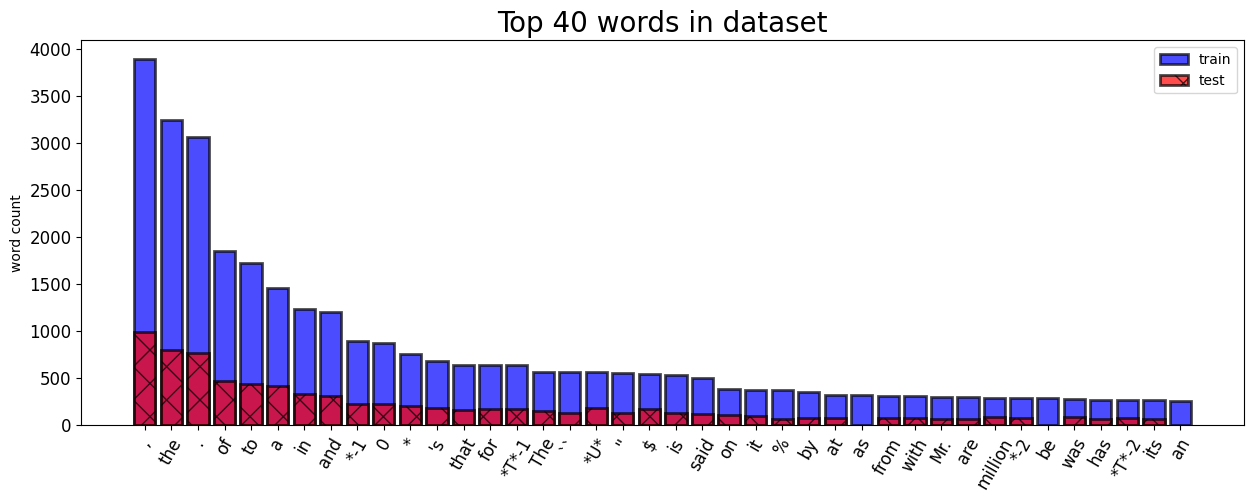

In [30]:
# make plot wider
plt.gcf().set_size_inches(15, 5)
# historgram of top 10 words
# change color to red
train_words = [n[0] for n in max_counts_train]
plt.bar(train_words, [n[1] for n in max_counts_train], label='train', alpha=0.7, hatch='', edgecolor='black', linewidth=2, color='blue')
plt.bar([n[0] for n in max_counts_test if n[0] in train_words], [n[1] for n in max_counts_test if n[0] in train_words], label='test', alpha=0.7, hatch='x', edgecolor='black', linewidth=2, color='red')

# increase font size for title
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

plt.xticks(rotation=60)
plt.legend()

plt.ylabel('word count')
plt.title(f'Top {len(train_words)} words in dataset', fontsize=20)

plt.savefig('wordcountshist.png')


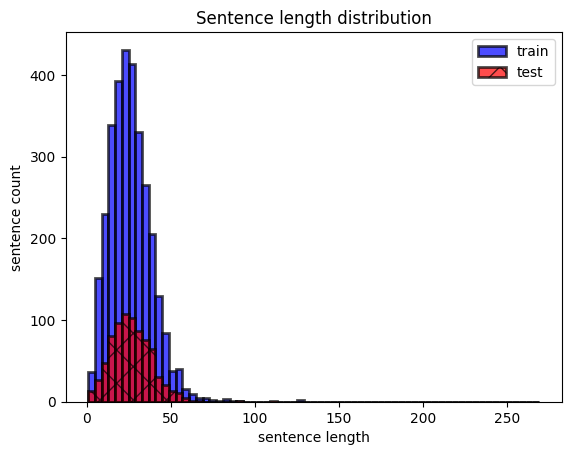

In [36]:
lens_train = [len(x) for x in data['train_sentences']]
lens_test = [len(x) for x in data['test_sentences']]
min_len = min(min(lens_train), min(lens_test))
max_len = max(max(lens_train), max(lens_test))

plt.hist(lens_train, bins=range(min_len, max_len+1, 4), label='train', alpha=0.7, hatch='', edgecolor='black', linewidth=2, color='blue')
plt.hist(lens_test, bins=range(min_len, max_len+1, 4), label='test', alpha=0.7, hatch='x', edgecolor='black', linewidth=2, color='red')
# plt.yscale('log')
plt.xlabel('sentence length')
plt.ylabel('sentence count')
plt.legend()
plt.title('Sentence length distribution')
plt.savefig('sentencelengthhist.png')

In [55]:
len([i for i in lens_train if i > 128])

0

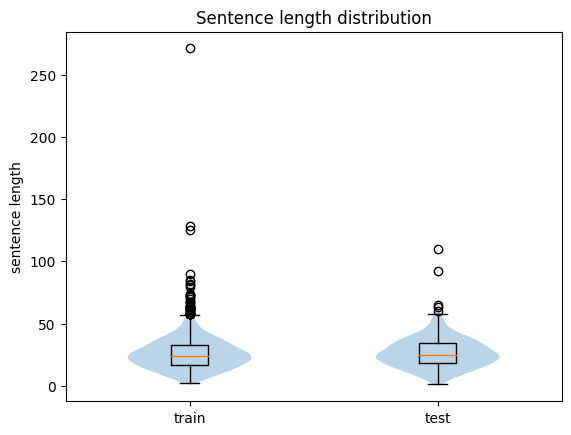

In [51]:
# boxplot
plt.boxplot([lens_train, lens_test], labels=['train', 'test'])
# violinplot
plt.violinplot([lens_train, lens_test], showextrema=False)
# color boxes
plt.ylabel('sentence length')
plt.title('Sentence length distribution')
plt.savefig('sentencelengthbox.png')

In [255]:
for i, n in enumerate(data['train_sentences']):
    if '*-1' in n and i != 2:
        print(i, n)
        print(data['train_tags'][i])
        break

3 ['The', 'new', 'company', 'will', 'attempt', '*-1', 'to', 'limit', 'the', 'shipyard', "'s", 'losses', ',', 'participants', 'said', '0', '*T*-2', '.']
[('The', 'DT'), ('new', 'JJ'), ('company', 'NN'), ('will', 'MD'), ('attempt', 'VB'), ('*-1', '-NONE-'), ('to', 'TO'), ('limit', 'VB'), ('the', 'DT'), ('shipyard', 'NN'), ("'s", 'POS'), ('losses', 'NNS'), (',', ','), ('participants', 'NNS'), ('said', 'VBD'), ('0', '-NONE-'), ('*T*-2', '-NONE-'), ('.', '.')]


## build simple model

In [133]:

train_dataset = sbert.ListDataset(train_embeds_pooled, data['train_tags'], data['all_pos'])
test_dataset = sbert.ListDataset(test_embeds_pooled, data['test_tags'], data['all_pos'])

batch_size = 64
train_dataset = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: x)
test_dataset = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: x)


In [12]:
# get most common pos
pos_counts = np.bincount([y for n in train_dataset.dataset.data for y in n[3]])
print('most common:', pos_counts.argmax(), data['all_pos'][pos_counts.argmax()])
print('predicting most common pos would be', 100*pos_counts[pos_counts.argmax()]/pos_counts.sum())

most common: 20 NN
predicting most common pos would be 13.024323885831244


In [49]:
reload_my_libs()

device = 'cpu'

model_config = {
    'input_dim': 768, 
    # 'hidden_dims': [768],
    'output_dim': len(data['all_pos']),
    # 'dropout': 0.4,
}

model = sbert.SimpleModel(model_config).to(device)
param_count = sum([p.numel() for n,p in model.named_parameters()])
print(f'trainable #p: {param_count:,}')

lr = 1e-3
weight_decay = 0.0001
optim = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
criterion_ce = torch.nn.CrossEntropyLoss()
cur_epoch = 0

trainable #p: 625,966


In [53]:
# wandb.finish()

In [50]:
wandb.init(project="6.8630 Penn Treebank Project", config={
    "architecture": "SimpleModel",
    "dataset": "treebank_3914",

    "learning_rate": lr,
    'weight_decay': weight_decay,
    "model_config": model_config,
    "#params": param_count,
})

train_acc,▁▅▆▇▇▇▇▇▇▇▇▇▇███████████████████████████
train_loss,█▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▇▇▇▇██████████████████████████████████
val_loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,98.68209
train_loss,0.07369
val_acc,91.36211
val_loss,0.29738


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [191]:
for _ in range(100):
    train_acc = sbert.single_epoch(model, train_dataset, criterion_ce, epoch=cur_epoch, optim=optim, is_train=True, device=device)
    val_acc = sbert.single_epoch(model, test_dataset, criterion_ce, epoch=cur_epoch, optim=None, is_train=False, device=device)
    if val_acc > float(sbert.read_json_prop('best_val')):
        sbert.write_json_prop('best_val', val_acc)
        torch.save({'params': model.state_dict(), 'config': model.model_config}, 'best_model.pt')
        print('---saved best model---')
    cur_epoch += 1

Val Epoch: 500 Acc: 92.8% Loss: 0.255478: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.72it/s]

---saved best model---


In [201]:
sbert.single_epoch(model, test_dataset, criterion_ce, epoch=cur_epoch, optim=None, is_train=False, device=device)

Val Epoch: 501 Acc: 92.8% Loss: 0.255478: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  8.62it/s]


92.75390529952796

In [196]:
print(data['all_pos'])

['#', '$', "''", ',', '-LRB-', '-NONE-', '-RRB-', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


In [102]:
new_sentance = [
    'This is a test sentance'.split(' '),
    'This is a valid sentance'.split(' '),
    'The old man the boat'.split(' '),
    'Adam and Joe man the boat'.split(' '),
]

embeds, attn_masks = sbert.sbert_encode_batched(sbert_model, sbert_tokenizer, [' '.join(x) for x in new_sentance], 64, verbose=False)
new_embeds_pooled = sbert.pool_tokens(new_sentance, embeds, attn_masks, sbert_tokenizer, verbose=False)
with torch.no_grad():
    new_embeds_out = [model(x) for x in new_embeds_pooled]

for i in range(len(new_sentance)):
    o = new_embeds_out[i]
    prob_pos, pred_pos_id = torch.softmax(o, dim=1).max(dim=1)
    pred_pos = [data['all_pos'][x] for x in pred_pos_id]
    print('sent', new_sentance[i])
    print('pred', pred_pos)
    print('prob', [str(round(100*x.item()))+'%' for x in prob_pos])
    print('')


sent ['This', 'is', 'a', 'test', 'sentance']
pred ['DT', 'VBZ', 'DT', 'NN', 'NNP']
prob ['56%', '98%', '99%', '95%', '70%']

sent ['This', 'is', 'a', 'valid', 'sentance']
pred ['DT', 'VBZ', 'DT', 'JJ', 'NN']
prob ['57%', '100%', '100%', '100%', '80%']

sent ['The', 'old', 'man', 'the', 'boat']
pred ['DT', 'NNP', 'NNP', 'DT', 'NNP']
prob ['96%', '99%', '98%', '72%', '93%']

sent ['Adam', 'and', 'Joe', 'man', 'the', 'boat']
pred ['NNP', 'CC', 'NNP', 'VBP', 'DT', 'NN']
prob ['100%', '90%', '100%', '57%', '97%', '86%']



In [200]:
len(data['train_sentences']), len(data['test_sentences'])

(3131, 783)